Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [101]:
NAME = "In Wai Cheong"
COLLABORATORS = ""

---

In [102]:
from __future__ import print_function
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# HW 8:  Linear Algebra Part 2

## Question 1 Ill-conditioned matrices

Consider the system of equations $Ax = b$ defined by
$$A = \begin{bmatrix}
        0.780 & 0.563 \\
        0.913 & 0.659 
    \end{bmatrix}
    \quad \text{and} \quad 
    b = \begin{bmatrix}
        0.217 \\
        0.254 
    \end{bmatrix}.
$$

The true solution of this system is 

$$x^T = [1, -1]$$

Consider for the following questions the **approximate** solutions

$$
    x^T_1 = [0.999, -1.001] \quad \text{and} \quad x^T_2 = [0.341, -0.087]
$$

and define the residual $r(y)$ as

$$
    r(y) = b - A y.
$$

**(a)** (6) Compute the residuals (you may use `numpy`) $||r(x_1)||$ and $||r(x_2)||$ for the two approximate solutions using a couple of different norms.  Does the more accurate solution have a smaller residual?  Does it matter which norm you use?

In [103]:
# YOUR CODE HERE
A = numpy.array([[0.780,0.563],[0.913,0.659]])
b = numpy.array([[0.217],[0.254]])
x1 = numpy.array([[0.999],[-1.001]])
x2 = numpy.array([[0.341],[-0.087]])

rx1 = b - A*x1
rx2 = b - A*x2

normrx1_1 = numpy.linalg.norm(rx1,ord=1)
normrx1_2 = numpy.linalg.norm(rx1,ord=2)
normrx1_inf = numpy.linalg.norm(rx1,ord=numpy.inf)

normrx2_1 = numpy.linalg.norm(rx2,ord=1)
normrx2_2 = numpy.linalg.norm(rx2,ord=2)
normrx2_inf = numpy.linalg.norm(rx2,ord=numpy.inf)

normrx1 = [normrx1_1,normrx1_2,normrx1_inf]
print(normrx1)

normrx2 = [normrx2_1,normrx2_2,normrx2_inf]
print(normrx2)

[1.730133, 1.6216011428041541, 2.081572]
[0.38241100000000006, 0.4565738878802673, 0.6447640000000001]


## Solution

We have that:

$||r(x_1)||_1 = 1.730133$ <br>
$||r(x_1)||_2 = 1.6216011428041541$ <br>
$||r(x_1)||_\infty = 2.081572$ <br>
$||r(x_2)||_1 = 0.38241100000000006$ <br>
$||r(x_2)||_2 = 0.4565738878802673$ <br>
$||r(x_2)||_\infty = 0.6447640000000001$ 

**(b)** [4] Compute $||A||$, $||A^{-1}||$ and the condition number $\kappa(A)$ of the matrix using the $L_2$ and $L_\infty$ norms.  Again you can use `numpy`.

In [106]:
# YOUR CODE HERE
normA_2 = numpy.linalg.norm(A,ord=2)
normA_inf = numpy.linalg.norm(A,ord=numpy.inf)
print("2-Norm of A:", normA_2)
print("Inf-Norm of A:", normA_inf, "\n")

A_inv = numpy.linalg.inv(A)
normAinv_2 = numpy.linalg.norm(A_inv,ord=2)
normAinv_inf = numpy.linalg.norm(A_inv,ord=numpy.inf)
print("2-Norm of A inv:", normAinv_2)
print("Inf-Norm of A inv:", normAinv_inf, "\n")

kA_1 = numpy.linalg.cond(A,p=2)
kA_inf = numpy.linalg.cond(A,p=numpy.inf)
print("K(A)_2:", kA_1)
print("K(A)_inf:", kA_inf)

2-Norm of A: 1.4809520586432041
Inf-Norm of A: 1.572 

2-Norm of A inv: 1480952.0584615201
Inf-Norm of A inv: 1692999.9997923018 

K(A)_2: 2193218.99965077
K(A)_inf: 2661395.9996734983


**(c)** [8] Calculate the SVD of A and do the following
* check your your answers for $||A||_2$ and $K_2(A)$ in terms of the singular values of $A$
* Compute $A_1$, the best fit rank-1 approximation to $A$.
* Compute $A - A_1$ and calculate $|| A - A_1||_2$ and compare to the singular values
* Given $A_1$ find its pseudo-inverse $A^+$
* Find the approximate solution $\mathbf{x}^+ = A^+\mathbf{b}$ and calculate $||\mathbf{r}(\mathbf{x}^+)||_2$

In [59]:
# YOUR CODE HERE
U, sigma, V_T = numpy.linalg.svd(A, full_matrices=True)
print("U:", U, "\n")
print("Sigma:", sigma, "\n")
print("V:", V_T)

U: [[-0.6495558126320321 -0.7603139129832758]
 [-0.7603139129832757  0.6495558126320323]] 

Sigma: [1.480952058643204e+00 6.752413046207509e-07] 

V: [[-0.8108433553931955 -0.5852632339509327]
 [-0.5852632339509327  0.8108433553931955]]


YOUR ANSWER HERE

**(d)** [4] Use the SVD to explain the behavior from part (a) 

Hint:  to understand this problem,  consider the change in the residual $\delta \mathbf{r}$ for a change in the solution vector $\delta \mathbf{x}$, i.e.
$$
    \delta\mathbf{r} = \mathbf{r}(\mathbf{x} + \delta\mathbf{x}) - \mathbf{r}(\mathbf{x})
$$

and compute upper and lower bounds on

$$
    \frac{||\delta \mathbf{r}||_2}{||\delta\mathbf{x}||_2}
$$
and consider what values of $\delta\mathbf{x}$ correspond to the upper and lower bounds.

Then consider the behavior of $\delta\mathbf{x}_i = \mathbf{x} - \mathbf{x}_i$ for $i=1,2$ above and explain the difference in residuals (hint: think SVD)

YOUR ANSWER HERE

In [ ]:
x = numpy.array([[1], [-1]])
delta_x_1 = x_1 - x
delta_x_2 = x_2 - x

y_1 = V_T.dot(delta_x_1)
y_2 = V_T.dot(delta_x_2)

print('delta_x1 = {}'.format(delta_x_1))
print('V_T delta_x1 ={}'.format(y_1))
print('delta_x2 = {}'.format(delta_x_2))
print('V_T delta_x2 ={}'.format(y_2))


### Question 2 - Hidden Figures

Okay a little more fun with the SVD.  Here we are going to use it extract low-dimensional information embedded in high dimensions.

The following cells will read in a matrix of 46765 samples of 5-dimensional data and make a series of scatter plots comparing the data along each dimension pairwise.

In [4]:
data = pd.read_csv('data.csv.gz').values
print('shape = {}'.format(data.shape))

shape = (46765, 5)


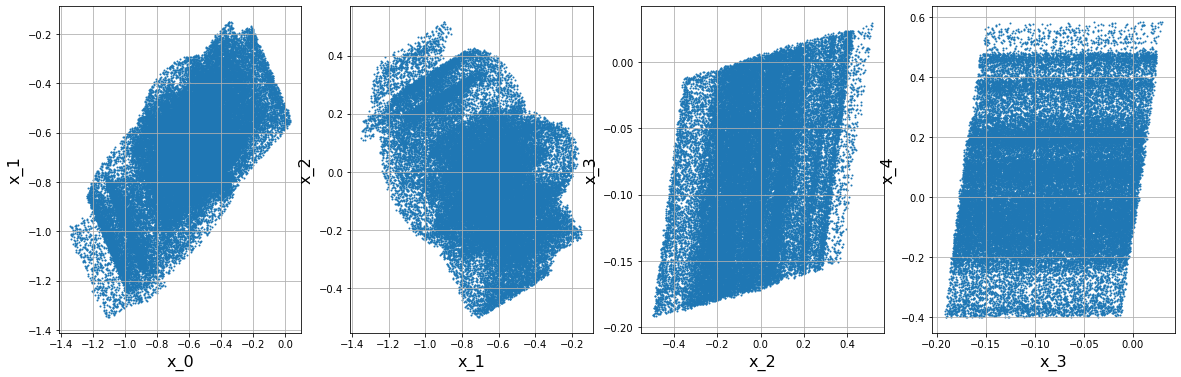

In [5]:
# plot scatter diagrams

fig = plt.figure(figsize=(20,6))
for i in range(4):
    axes = fig.add_subplot(1,4,i+1)
    axes.scatter(data[:,i],data[:,i+1],s=1)
    axes.set_xlabel('x_{}'.format(i), fontsize=16)
    axes.set_ylabel('x_{}'.format(i+1),fontsize=16)
    axes.grid()
plt.show()

**(a)** [6] Now demean the data and use the SVD to determine the dimension of the subspace of $\mathbb{R}^5$ that contains the data. Making a plot of the singular values will help. (hint: you will also want to use the `full_matrices=False` argument to the SVD to get the skinny SVD and save a lot of computation and memory)

Text(0.5, 1.0, 'Singular Values')

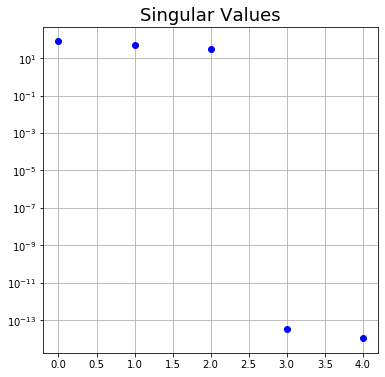

In [6]:
# YOUR CODE HERE
data_mean =  numpy.mean(data,0)
X = data - data_mean
X = X.transpose()
U, sigma, V_T = numpy.linalg.svd(X, full_matrices=False)

fig = plt.figure(figsize=(6,6))
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(sigma,'bo')
axes.grid()
axes.set_title('Singular Values', fontsize=18)

**(b)** [4]  Principal Components. Make a 2-D scatter plot that projects the data onto the plane spanned by the first two principal components (singular vectors of $V$).  and comment.  (**Extra Credit** do this in 3-D)

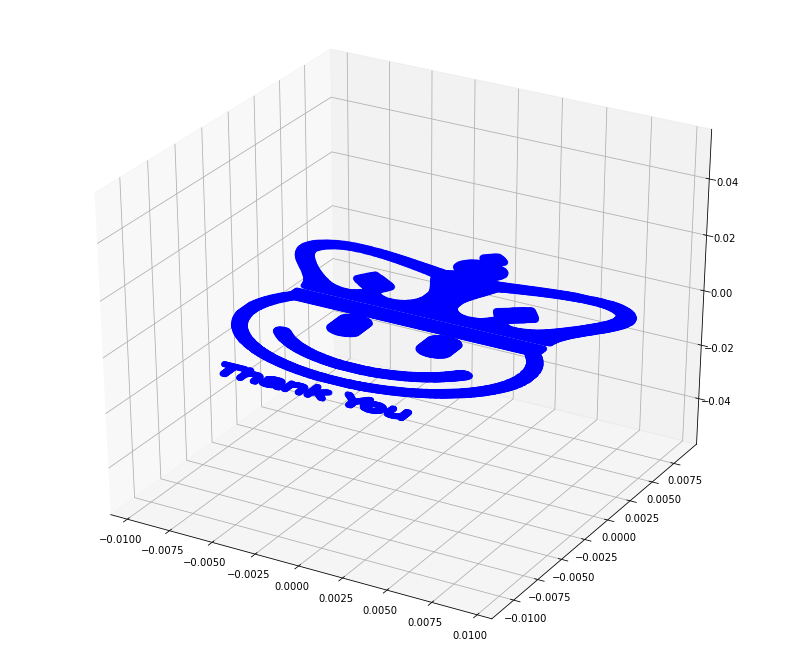

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-V_T[1,:], -V_T[0,:], c='b', marker='o')

THIS IS SO COOL!!

I had to switch around the axes and put negative signs to that it looked nice.

Other than that, thank you professor for being so wonderful despite all that's going on.

### Question 3 - Extra Credit LU Factorization

Gaussian elimination is usually one of the first operations students learn in linear algebra but we seemed to have skipped it in lecture!  Let us fix that here in the homework.  Make sure to read the lecture notes on Gaussian elimination when doing this question.  Useful versions of pseudo-code for this algorithm are available in that notebook.

**(a)** (5 points) By hand compute the $LU$ factorization of the matrix
$$
    A = \begin{bmatrix}
        4 & 8 & 1 \\
        8 & 20 & 4 \\
        16 & 36 & 7
    \end{bmatrix}.
$$
Make sure to compute all the way to the matrix $L$, not the components of the inverse.  You do not have to worry about pivoting.

## Solution

We begin with:
$$
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 
\end{bmatrix}
\begin{bmatrix}
4 & 8 & 1 \\
8 & 20 & 4 \\
16 & 36 & 7 
\end{bmatrix}
$$

Then we do $R_2 = R_2 - 2R_1$

$$
\begin{bmatrix}
1 & 0 & 0 \\
2 & 1 & 0 \\
0 & 0 & 1 
\end{bmatrix}
\begin{bmatrix}
4 & 8 & 1 \\
0 & 4 & 2 \\
16 & 36 & 7 
\end{bmatrix}
$$

$R_3 = R_3 - 4R_1$
$$
\begin{bmatrix}
1 & 0 & 0 \\
2 & 1 & 0 \\
4 & 0 & 1 
\end{bmatrix}
\begin{bmatrix}
4 & 8 & 1 \\
0 & 4 & 2 \\
0 & 4 & 3 
\end{bmatrix}
$$

Then finally: $R_3 = R_3 - R_2$
$$
\begin{bmatrix}
1 & 0 & 0 \\
2 & 1 & 0 \\
4 & 1 & 1 
\end{bmatrix}
\begin{bmatrix}
4 & 8 & 1 \\
0 & 4 & 2 \\
0 & 0 & 1 
\end{bmatrix}
$$

Therefore:

$L=\begin{bmatrix}
1 & 0 & 0 \\
2 & 1 & 0 \\
4 & 1 & 1 
\end{bmatrix}$,
$\ \ U=\begin{bmatrix}
4 & 8 & 1 \\
0 & 4 & 2 \\
0 & 0 & 1 
\end{bmatrix}$

**(b)** (10 points) Write a function that computes the $LU$ factorization of a given matrix $A \in \mathbb R^{n \times n}$ without using `numpy` or `scipy` packages.  Make sure to also return the pivoting matrix, i.e. compute the matrices $P$, $L$, and $U$ where
$$
    P A = L U.
$$
Note that the provided function `swap_rows` may be useful although you do not have to use it.  You may also want to use the example in the notes to test your basic algorithm with (i.e. `A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)` noting that the algorithm will complain without the casting to `float`).

In [8]:
def swap_rows(i, j, A, column_indices=None):
    r"""
    Swap the ith and jth rows of the matrix A in place
    
    Optional argument column_indices is a tuple that controls 
    the columns being swapped.  Defaults to the entire row.
    """
    if column_indices is None:
        column_indices = (0, A.shape[0])

    pivot = A[i, column_indices[0]:column_indices[1]].copy()
    A[i, column_indices[0]:column_indices[1]] = A[j, column_indices[0]:column_indices[1]]
    A[j, column_indices[0]:column_indices[1]] = pivot
    return pivot


def LU_factorization(A):
    
    m = len(A)
    L = numpy.identity(len(A))
    U = A.copy()
    P = numpy.identity(len(A))
    
    for k in range(0,m):
        i = numpy.argmax(numpy.abs(U[k:m,k]))
        i += k
     
        swap_rows(i,k,U,[k,m])
        swap_rows(i,k,L,[0,k])
        swap_rows(i,k,P)
        
        for j in range(k+1,m):
            L[j,k] = U[j,k]/U[k,k]
            U[j,k:m] = U[j,k:m]-L[j,k]*U[k,k:m]
            
    return P, L, U

In [9]:
import scipy.linalg
# A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)
A = numpy.random.uniform(low=1.0, high=10.0, size=(25, 25))
P, L, U = LU_factorization(A)
P_s, L_s, U_s = scipy.linalg.lu(A)
numpy.testing.assert_allclose(P, numpy.linalg.inv(P_s))
numpy.testing.assert_allclose(L, L_s)
numpy.testing.assert_allclose(U, U_s, atol=1e-8)
print("Success!")

Success!


**(c)** (5 points) For this question write a function that solves the system $A x = b$ given an $A$ and $b$ using your $LU$ factorization function and the pivot matrix.  Again do not use any of the functions from `numpy` or `scipy` other than to check your solution.

In [10]:
def solve(A, b):
    
    P,L,U = LU_factorization(A)
    n = len(A)
    x = numpy.zeros(n)
    y = numpy.zeros(n)
    Pb = numpy.dot(P,b)
    

    for i in range(0,n):
        Ly = 0
        for j in range(0,i):
            Ly += L[i,j] * y[j]
            
        y[i] = Pb[i]-Ly
 
    for i in range(1,n+1):  
        Ux = 0        
        for j in range(1,i):
            Ux += U[n-i,n-j] * x[n-j]
            
        y[n-i] -= Ux
        x[n-i] = y[n-i] / U[n-i,n-i]
        x[n-1] = y[n-1] / U[n-1,n-1]
    
    return x

In [11]:
m = 10
A = numpy.random.uniform(size=(m, m))
b = numpy.random.uniform(size=(m))
x = solve(A, b)
x_n = numpy.linalg.solve(A, b)
numpy.testing.assert_allclose(x, x_n)
print("Success!")

Success!
